# Final Tutorial
# Analysis of Crime in Maryland
   Group member: Zhifan Wang, Shanghua Yang

## INTRODCUTION

The overall objective of this project will be to discover the relationship between the year and the total crime number in Maryland and finally predict the total crime number in 2021. Hypothesis tests will be setup and different models will be built. 
For citizens in Maryland, we hope this analysis would introduce some helpful facts about their neighborhoods so that they can be more familiar with the environment they are living in. For the governor, we believe this tutorial would be able to provide some potential solutions to the crime problem and help prevent future crime based on our prediction.

Throughout this tutorial, we will attempt to uncover the potential trends of numbers of typical violent and property crimes such as murder, rape, robbery and larceny theft etc. and propotion of each type of crimes and proportion of violent and property cirmes. Also, we will using linear model and polynomial model to predict total crimes in Maryland.

## Required Tools

1. sqlite3
2. sys
3. numpy
4. pandas
5. matplotlib
6. sklearn
7. scipy
8. seanborn
9. statsmodels.api

In [1]:
import sqlite3
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, datasets
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

## Collecting & Tidying the Data

The datasets we are going to analyze is from the website:https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs The dataset comes in the form of a CSV (Comma Separated Value) file. So the pandas.read_csv function is used here to read the data and put all the data into a Panda Dataframe for us.

In [2]:
data = pd.read_csv("data.csv")
data.head()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


As shown in the dataframe above, there are some missing values for several columns. 

In order to have a better understanding of the missing values, all the rows containing the missing values are displayed as below so that we can choose the best way to handle them.

In [3]:
data.isnull().values.any()
is_NaN = data.isnull()
rows = is_NaN.any(axis=1)
df_r = data[rows]

In [4]:
data = data.fillna(0)

We observe missing values of the rate of change in the same year of 1975. Since 1975 is the starting year of our dataset, it makes sense that we cannot have any values of rate of change here.
So we decide to just set these values to zero.

In [5]:
data.columns = data.columns.str.replace(" ", "_")

# Explorative data analysis

This is explorative data analysis section. In this section, we will plot several charts such as scatter plot or pie chart to present trends of crimes from 1975 to 2017. For plotting scatter chart and pie chart, we will be using matplotlib. 'GRAND_TOTAL' is the total number of crime in a specific county, and we will using the sum of GRAND_TOTAL of all counties in the data to represent the numbers of crimes happended in a specific year, and plot a scatter chart with years as x-axis and numbers of crime happended in that year, and we will see the trends of numbers of crimes across time. 

Text(0, 0.5, 'Total_Crime')

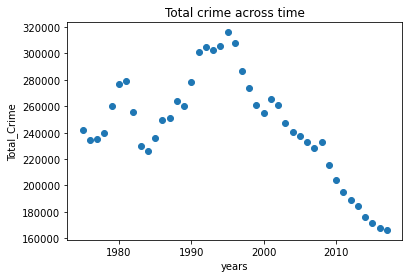

In [6]:
Total_crime = data.groupby('YEAR')['GRAND_TOTAL'].sum()
plt.title('Total crime across time')
x = Total_crime.index
y = Total_crime.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('Total_Crime')

From the scatter chart, we find out that from 1975 to 1995, the numbers of crimes was increasing, but since 1995, the numbers of crimes were gradually going down, and the decreasing trends seems like the total crime numbers are going to decrease in the future. 

After we have the scatter chart of total crimes across time, we will be repeating the process to get Murder numbers across time, rape numbers across time, robbery numbers accross time, Larcency theft across time and M/V theft across time to see if the general trends of each type of crime is consistent with each other or not. 

Text(0, 0.5, 'Murder')

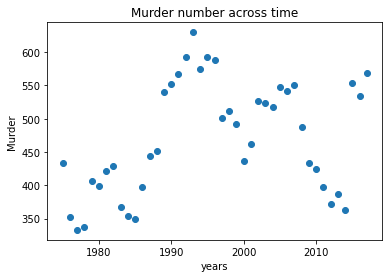

In [7]:
Murder = data.groupby('YEAR')['MURDER'].sum()
plt.title('Murder number across time')
x = Murder.index
y = Murder.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('Murder')

Text(0, 0.5, 'Rape')

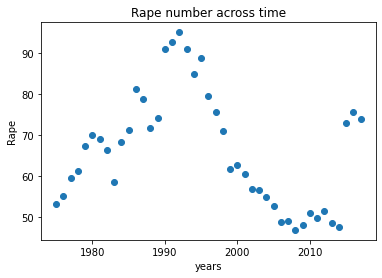

In [8]:
Rape = data.groupby('YEAR')['RAPE'].mean()
plt.title('Rape number across time')
x = Rape.index
y = Rape.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('Rape')

Text(0, 0.5, 'Robbery')

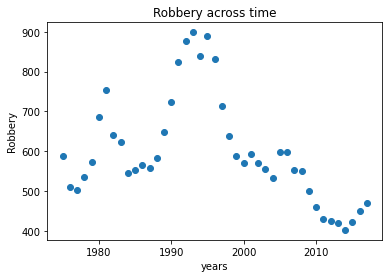

In [9]:
Robbery = data.groupby('YEAR')['ROBBERY'].mean()
plt.title('Robbery across time')
x = Robbery.index
y = Robbery.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('Robbery')

Text(0, 0.5, 'larceny_theft')

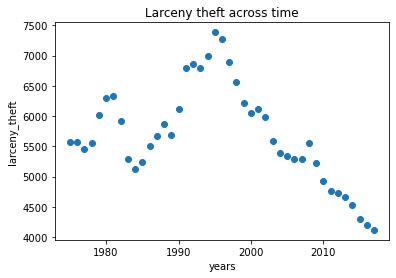

In [10]:
larceny_theft = data.groupby('YEAR')['LARCENY_THEFT'].mean()
plt.title('Larceny theft across time')
x = larceny_theft.index
y = larceny_theft.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('larceny_theft')

Text(0, 0.5, 'MV_theft')

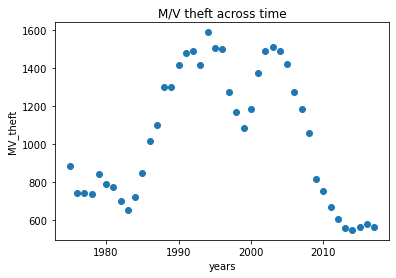

In [11]:
MV_theft = data.groupby('YEAR')['M/V_THEFT'].mean()
plt.title('M/V theft across time')
x = MV_theft.index
y = MV_theft.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('MV_theft')

After we have these 6 scatter charts, and we compared with each other. We can find out that the gerenal trends of these five types of crime is mostly consistent with total_crime which means the almost every types of crime was decreasing since 2000. 

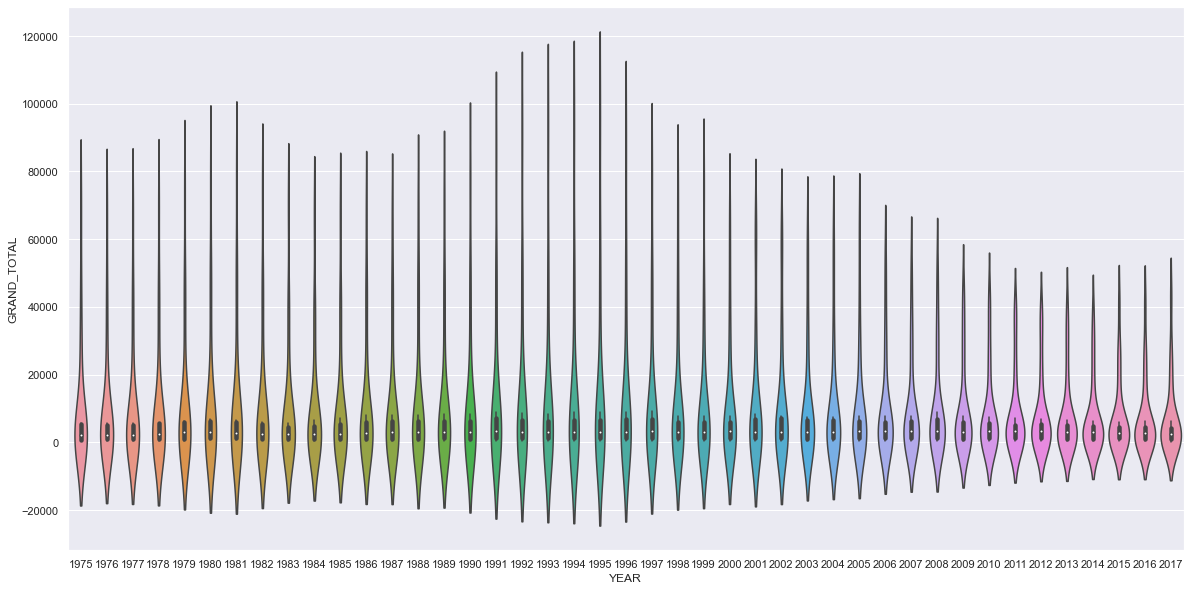

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
vp = sns.violinplot(x="YEAR", y="GRAND_TOTAL", data = data)

The chart above is called violin plot which is plotted by seaborn (sns). Violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

Text(0, 0.5, 'Percentage')

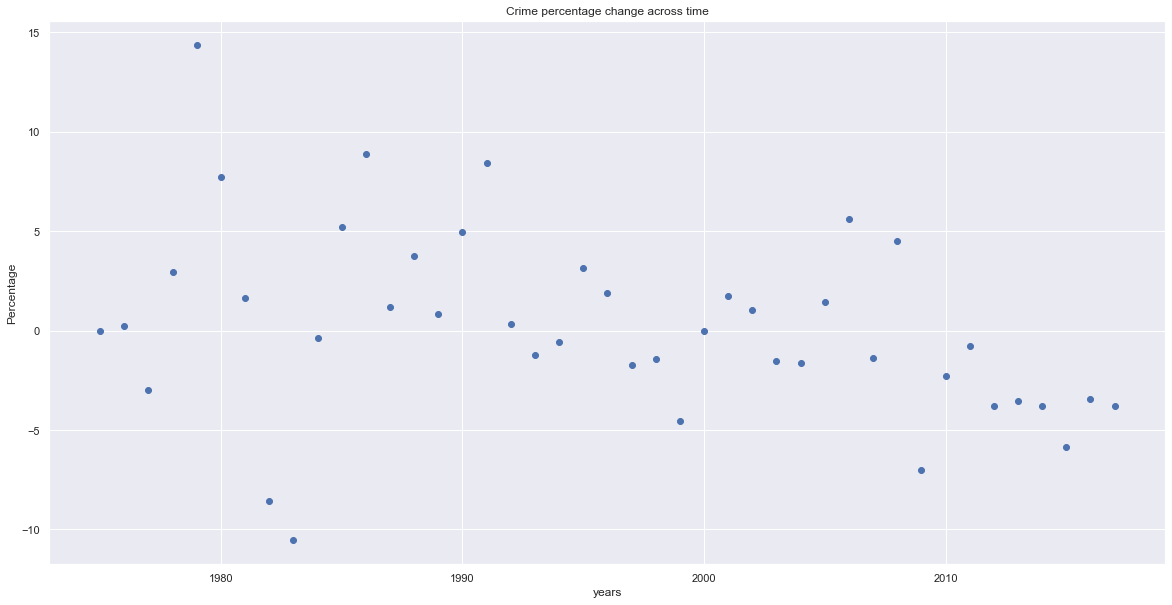

In [13]:
Total_crime = data.groupby('YEAR')['PERCENT_CHANGE'].mean()
plt.title('Crime percentage change across time')
x = Total_crime.index
y = Total_crime.values
plt.scatter(x,y)
plt.xlabel('years')
plt.ylabel('Percentage')

From above we can see the percentage change of numbers of crime each year. When the dots are below 0, it means number of crimes are decreasing this year. 

<function matplotlib.pyplot.show(close=None, block=None)>

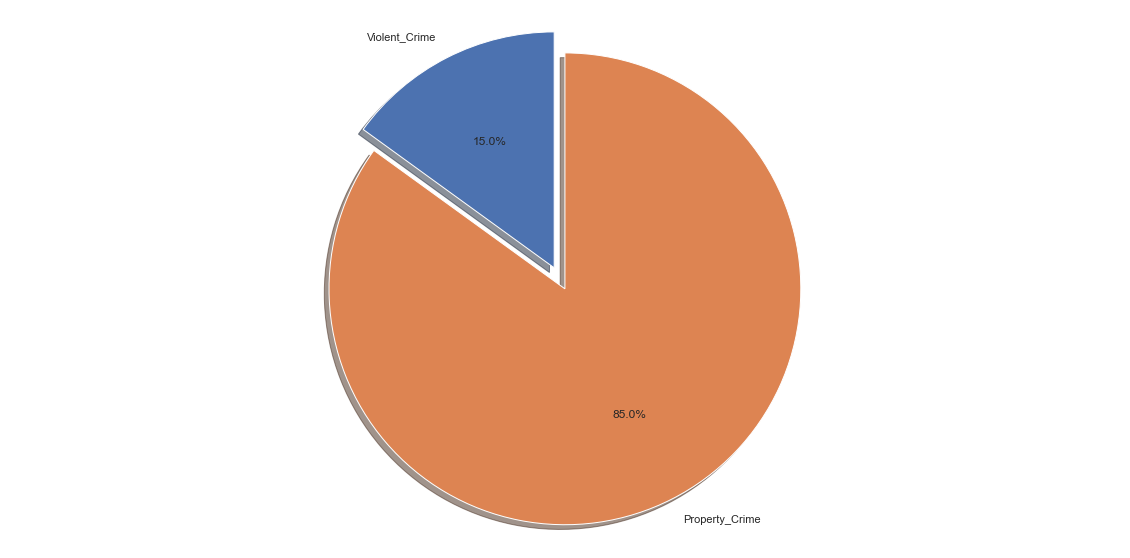

In [14]:
Violent_crime_ratio = data['VIOLENT_CRIME_TOTAL'].sum()
Property_crime_ratio = data['PROPERTY_CRIME_TOTALS'].sum()
fig1, ax1 = plt.subplots()
Ratio = [Violent_crime_ratio, Property_crime_ratio]

labels = 'Violent_Crime', 'Property_Crime'
explode = (0.1,0)
ax1.pie(Ratio, explode = explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal')
plt.show

Above pie chart shows the proportion of types of Crime. Violent crime only occupies 15% of the grand total crimes. Most of the crimes are property crime such as M/V theft and larceny theft

<function matplotlib.pyplot.show(close=None, block=None)>

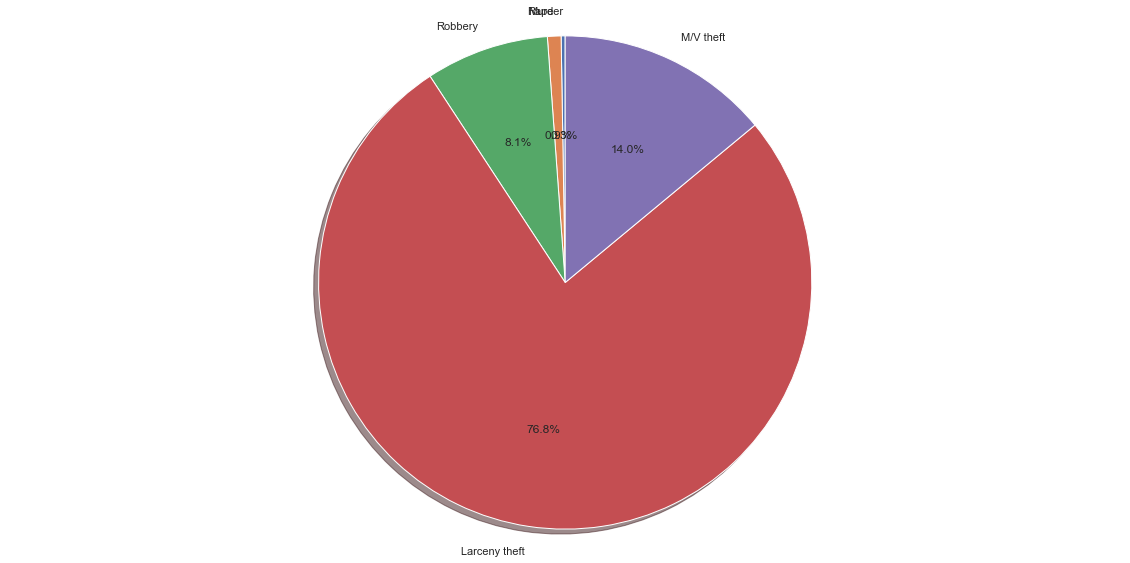

In [15]:
Murder_type = data["MURDER"].mean()
Rape_type = data['RAPE'].mean()
Robbery_type = data['ROBBERY'].mean()
Larceny_theft_type = data['LARCENY_THEFT'].mean()
MV_theft_type = data['M/V_THEFT'].mean()
fig2, ax2 = plt.subplots()
pie_chart = [Murder_type, Rape_type, Robbery_type, Larceny_theft_type, MV_theft_type]
labels = 'Murder','Rape','Robbery','Larceny theft','M/V theft'
explode = (0,0,0,0,0)
ax2.pie(pie_chart, explode = explode, labels = labels,  autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
plt.show

Above chart shows the proportion of each specific types of crime.

# Hypothesis Test & Machine Learning

## Linear Model

By observing the graph above and using intuition, we think there might be a linear relation between independent variable YEAR and the dependent variable GRAND_TOTAL. 

Therefore, we want to fit a linear regression model, and start a hypothesis test with null hypothesis of no relationship between YEAR and GRAND_TOTAL.

The linear regrssion model is created by the linear model from sklearn. For more information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

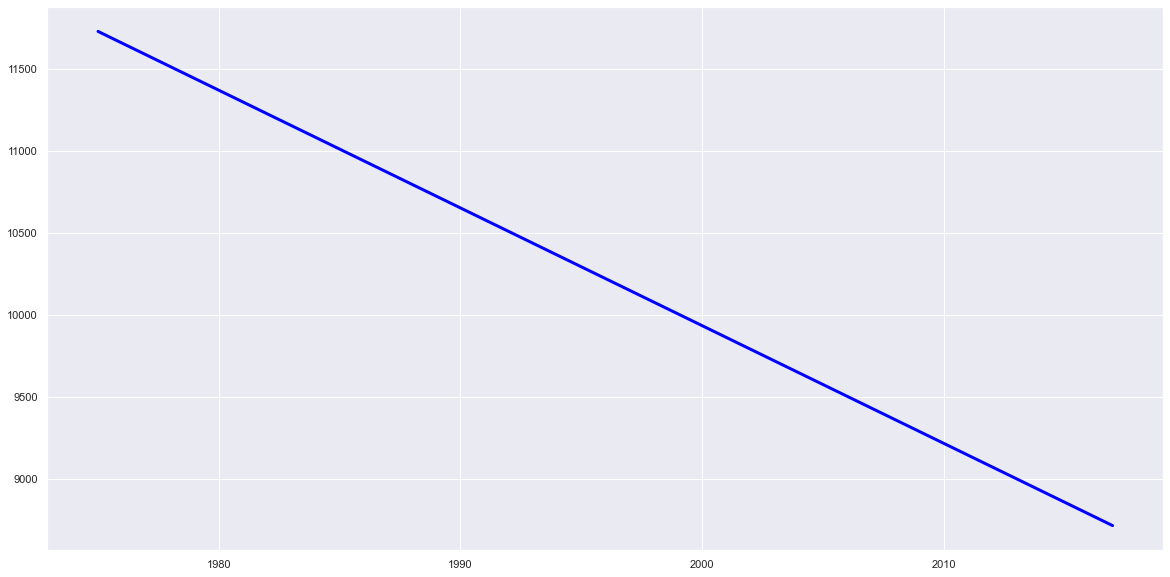

In [16]:
data = data.sort_values('YEAR')
reg = linear_model.LinearRegression()
new_year = np.array(data.YEAR)[:, np.newaxis]
reg.fit(new_year, data.GRAND_TOTAL)
crime_predicted = reg.predict(new_year)
data['crime_prediction']= crime_predicted 
plt.plot(new_year, crime_predicted, color='blue', linewidth=3)

In [17]:
print('Intercept:', reg.intercept_)
print('Coeff:', reg.coef_)
print('Score:',reg.score(new_year,data.GRAND_TOTAL))
print('Mean Absolute Error:', metrics.mean_absolute_error(data.GRAND_TOTAL, crime_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(data.GRAND_TOTAL, crime_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.GRAND_TOTAL, crime_predicted)))
print('Pearson correlation coefficient & p-value:', stats.pearsonr(data.GRAND_TOTAL, crime_predicted))

Intercept: 153380.66954847475
Coeff: [-71.72319541]
Score: 0.0026826458299703537
Mean Absolute Error: 12066.864583333327
Mean Squared Error: 294516762.1370686
Root Mean Squared Error: 17161.490673512853
Pearson correlation coefficient & p-value: (0.051794264450517144, 0.0963168536453429)


It turns out that the null hypothesis would not be rejected. The P-value is 0.096 which is bigger than the siginificance level of 0.05. Therefore, we should accept the null hypothesis, meaning that there is no linear relationship between year and total crime number. The score, which is the value of R^2, here is only about 0.0026.

We do notice a huge Root Mean Squared Error between the predicted total crime and the real total crime. So we decide to compute the residual by subtracting the predicted total crime from the real total crime and make a violin plot to display the distribution of the residual and to get a better understanding of our prediction.

To create a violinplot we use the the seaborn.violinplot() function. For more information: https://seaborn.pydata.org/generated/seaborn.violinplot.html

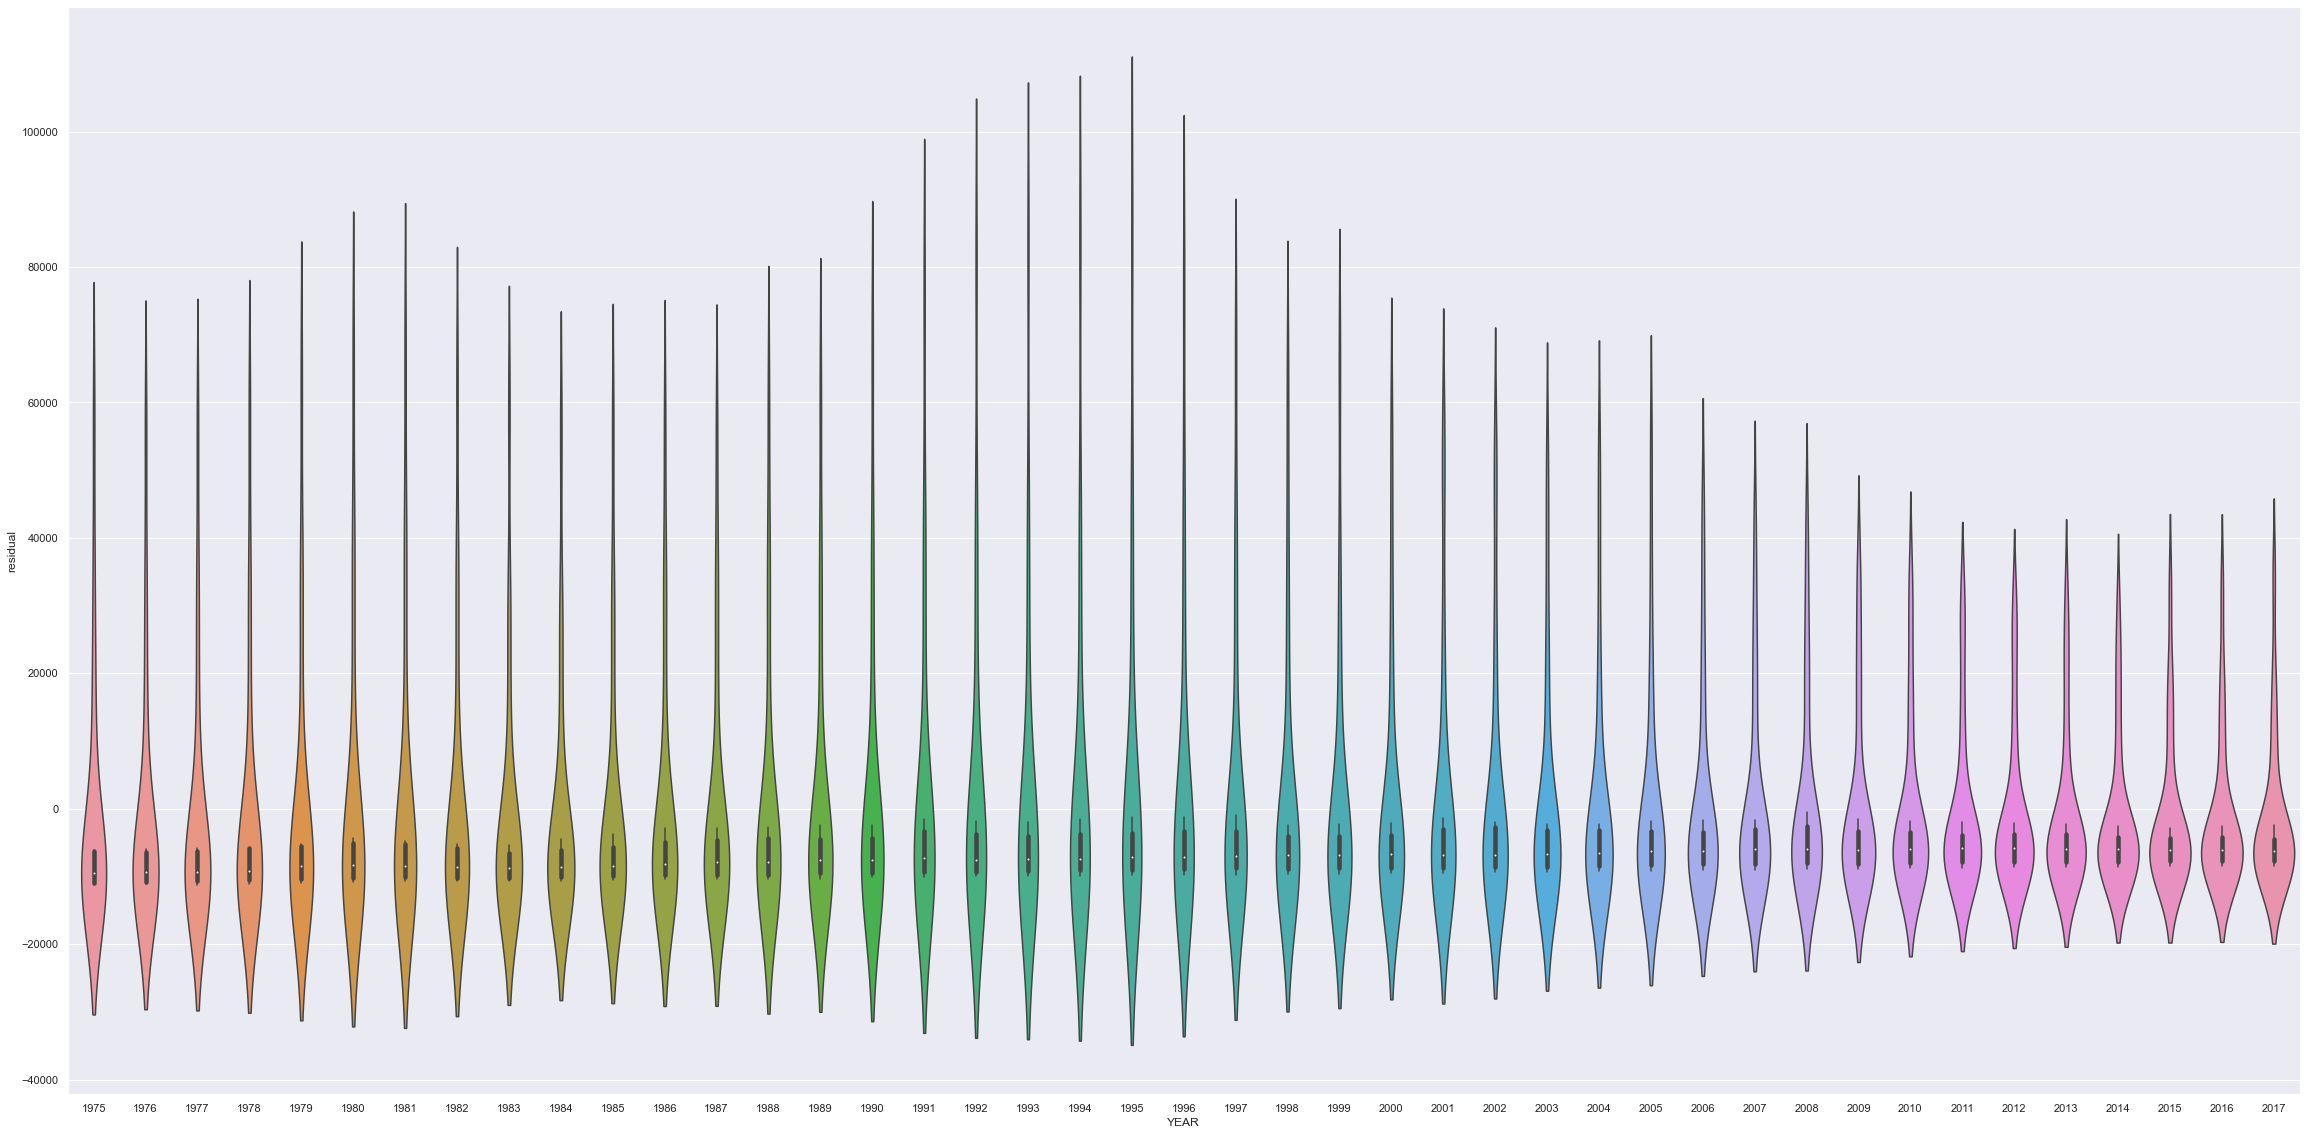

In [18]:
data['residual'] = data['GRAND_TOTAL'] - data['crime_prediction'] 
sns.set(rc={'figure.figsize':(40,20)})
ax = sns.violinplot(x="YEAR", y="residual", data = data)

From the graph above we can observe a really terrible prediction of the total crime. The range of the residual is extremely big every year, meaning that we are not considering the outliers. Also, the predicted crime seems to exceed the real number ever year

## Linear model with interaction terms
This violin plot would suggest a over generalization. Therefore, we decide to consider the difference between counties. We believe there is a dependence between residual and counties, since each county seems to has its own specific crime number.

A new linear regression model with interaction terms between year and county is implemented with the equation of:
###### Predicted_Total_Crime = constant + a1 * year + a2 * year * county1 + a3 * year * county2 +...+ aN * year * countyN
[a is the coefficient for each term]

In [19]:
Y = data.GRAND_TOTAL
X_inter = data[['YEAR','JURISDICTION']]
X_inter = pd.get_dummies(data=X_inter)##counties are transformed to binary
for i in X_inter.columns:
    if(i != 'YEAR'):
        X_inter['YEAR'+'*'+ i] = X_inter.YEAR * X_inter[i]
X_inter = sm.add_constant(X_inter)
inter_model = sm.OLS(Y, X_inter).fit()
data['interaction_prediction'] = inter_model.predict(X_inter).values

Here, we choose the model from the statsmodel package so that we can observe the regression results with more details in a table created. For more information using the model: https://www.statsmodels.org/stable/regression.html

In [20]:
inter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GRAND_TOTAL   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:13:47   Log-Likelihood:                -9895.8
No. Observations:                1032   AIC:                         1.989e+04
Df Residuals:                     984   BIC:                         2.012e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     1.472e+05   1.74e+04      8.466      0.000    1.13e+05    1.81e+05
YEAR                                       -68.8543      8.714     -7.902      0.000     -85.954     -51.755
JURISDICTION_Allegany County              -1.69e+05   8.69e+04     -1.945      0.052    -3.4e+05    1517.179
JURISDICTION_Anne Arundel County         -5.012e+04   8.69e+04     -0.577      0.564   -2.21e+05     1.2e+05
JURISDICTION_Baltimore City               1.961e+06   8.69e+04     22.567      0.000    1.79e+06    2.13e+06
JURISDICTION_Baltimore County              6.69e+05   8.69e+04      7.699      0.000    4.98e+05    8.39e+05
JURISDICTION_Calvert County              -1.959e+05   8.69e+04     -2.255      0.024   -3.66e+05   -2.54e+04
JURISDICTION_Caroline County             -1.727e+05   8.69e+04     -1.987      0.047   -3.43e+05   -2159.812
JURISDICTION_Carroll County              -1.708e+05   8.69e+04     -1.966      0.050   -3.41e+05    -330.172
JURISDICTION_Cecil County                -2.221e+05   8.69e+04     -2.556      0.011   -3.93e+05   -5.16e+04
JURISDICTION_Charles County              -2.172e+05   8.69e+04     -2.499      0.013   -3.88e+05   -4.66e+04
JURISDICTION_Dorchester County           -1.425e+05   8.69e+04     -1.640      0.101   -3.13e+05     2.8e+04
JURISDICTION_Frederick County            -1.755e+05   8.69e+04     -2.020      0.044   -3.46e+05   -4978.843
JURISDICTION_Garrett County              -1.449e+05   8.69e+04     -1.667      0.096   -3.15e+05    2.56e+04
JURISDICTION_Harford County              -9.848e+04   8.69e+04     -1.133      0.257   -2.69e+05     7.2e+04
JURISDICTION_Howard County               -1.827e+05   8.69e+04     -2.102      0.036   -3.53e+05   -1.22e+04
JURISDICTION_Kent County                 -1.383e+05   8.69e+04     -1.591      0.112   -3.09e+05    3.22e+04
JURISDICTION_Montgomery County            2.637e+05   8.69e+04      3.035      0.002    9.32e+04    4.34e+05
JURISDICTION_Prince George's County        4.35e+05   8.69e+04      5.006      0.000    2.64e+05    6.06e+05
JURISDICTION_Queen Anne's County         -1.588e+05   8.69e+04     -1.827      0.068   -3.29e+05    1.17e+04
JURISDICTION_Somerset County             -1.486e+05   8.69e+04     -1.711      0.087   -3.19e+05    2.19e+04
JURISDICTION_St. Mary's County           -1.812e+05   8.69e+04     -2.085      0.037   -3.52e+05   -1.07e+04
JURISDICTION_Talbot County               -1.415e+05   8.69e+04     -1.628      0.104   -3.12e+05     2.9e+04
JURISDICTION_Washington County           -1.536e+05   8.69e+04     -1.768      0.077   -3.24e+05    1.69e+04
JURISDICTION_Wicomico County             -2.053e+05   8.69e+04     -2.362      0.018   -3.76e+05   -3.48e+04
JURISDICTION_Worcester County  

Our R^2 is 0.958 now! We do assume a higher R^2 value here. But this model fits unexpectedly well.

Let's create a new violin plot to observe the distribution of the new residual.

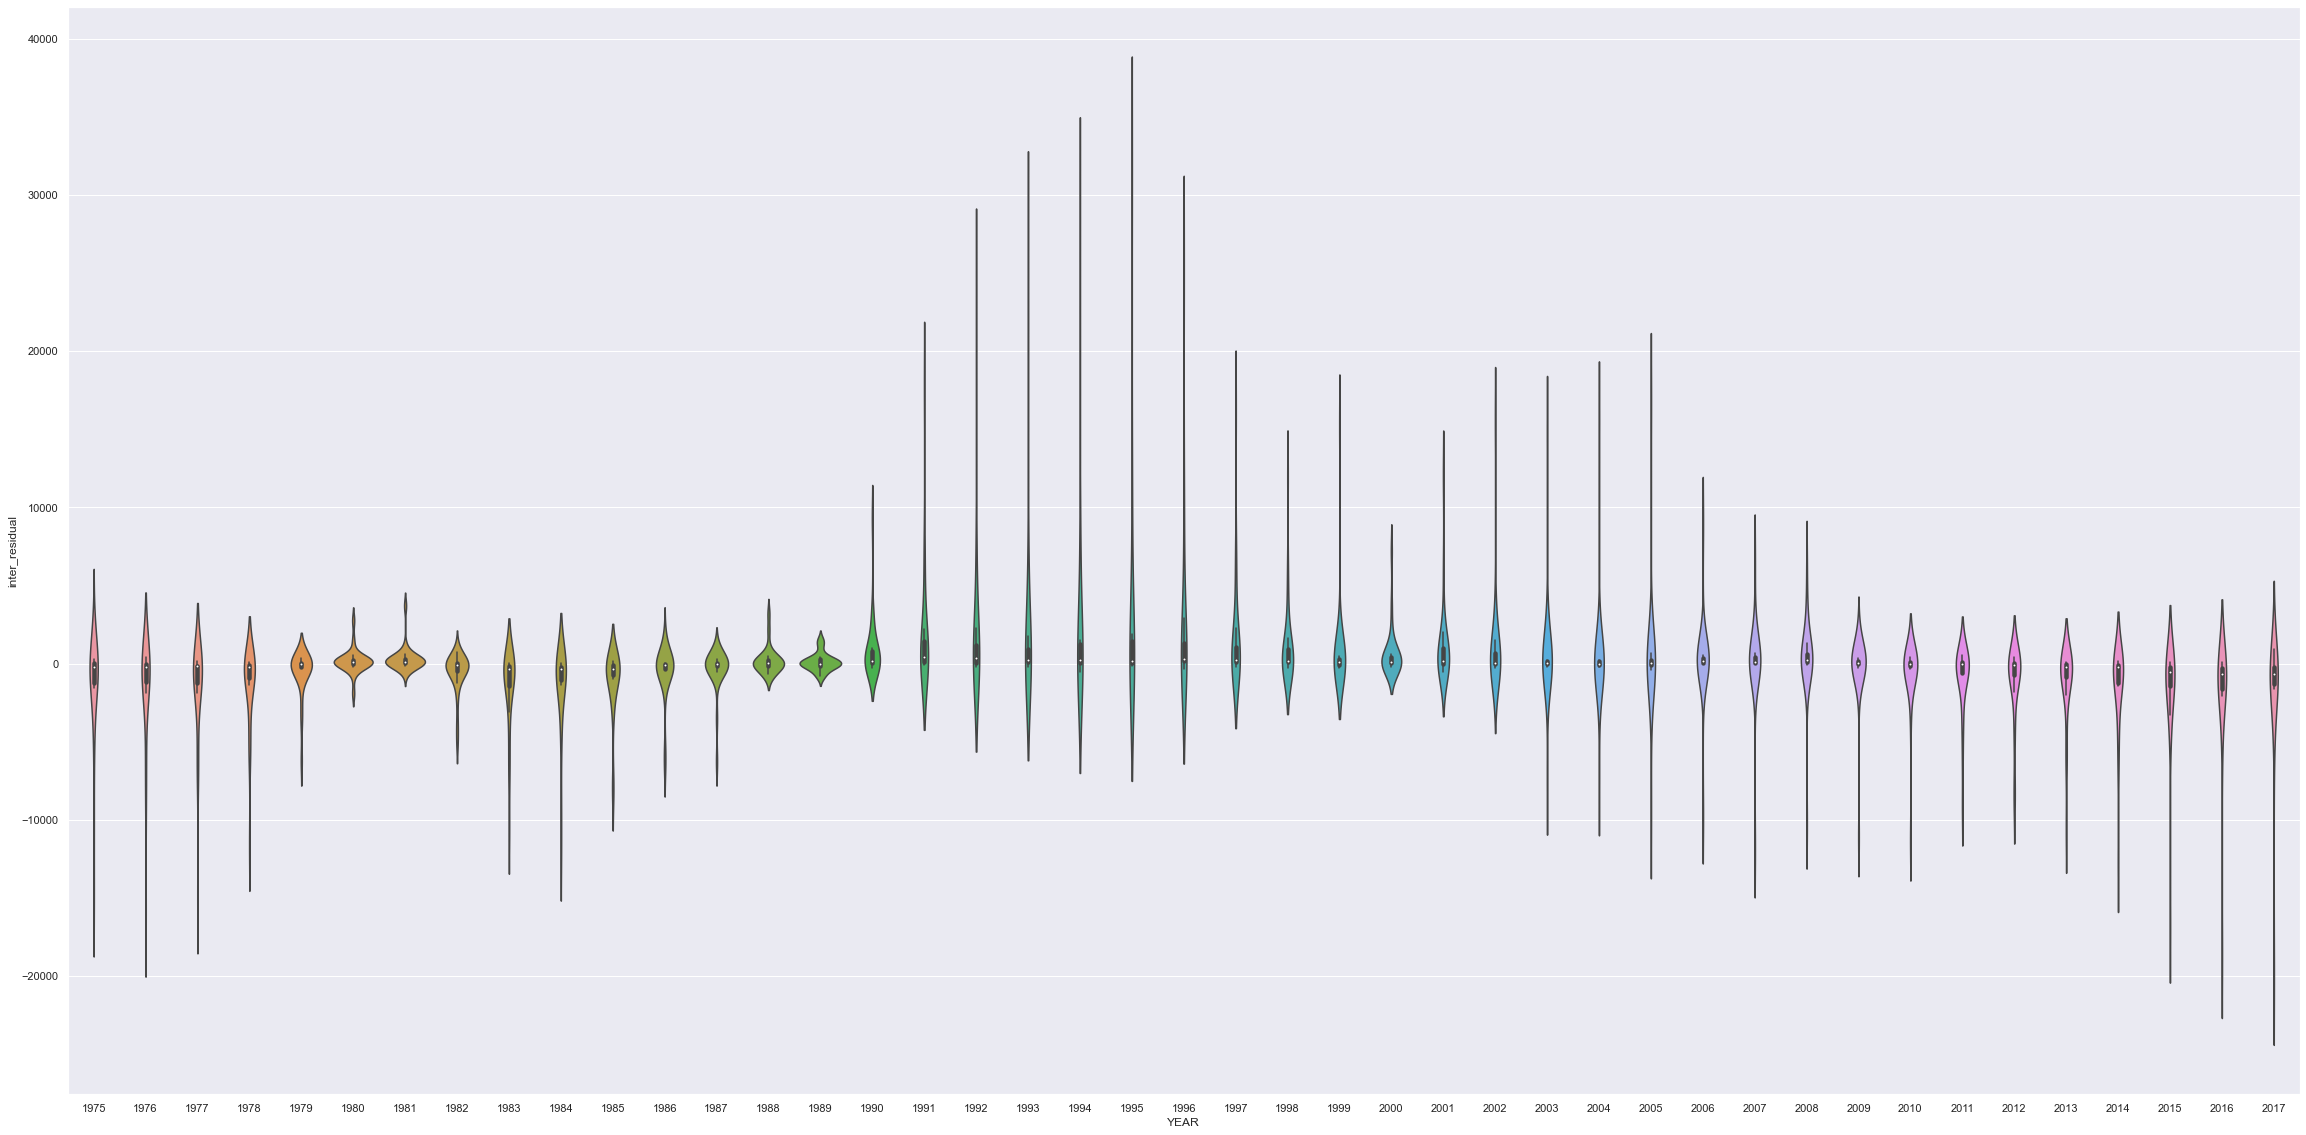

In [21]:
data['inter_residual'] = data['GRAND_TOTAL'] - data['interaction_prediction'] 
sns.set(rc={'figure.figsize':(40,20)})
ax = sns.violinplot(x="YEAR", y="inter_residual", data = data)

From the violin plot shown above, we can conclude the effect of year on total crime could be influenced remarkably by the counties, which matches our intuition.

Most of the mean residuals lie on the 0 axis, which is good. However, there are certain outliers shown in the graph especially between 1991 and 1996 and after 2010. After 2010, our model seems to predict bigger numbers of total crime compred to the real numbers.

Let's take a detailed look on the total crime of PG county, which is our county, after 2010. 

In [22]:
pg = data.loc[(data['YEAR'] >= 2010) & (data['JURISDICTION'] == 'Prince George\'s County')]
pg[['YEAR','GRAND_TOTAL','interaction_prediction']]

,YEAR,GRAND_TOTAL,interaction_prediction
723,2010,43073,44460.852009
724,2011,38110,44193.301572
725,2012,36072,43925.751134
726,2013,33058,43658.200696
727,2014,30671,43390.650258
728,2015,26386,43123.099820
729,2016,24230,42855.549382
730,2017,22558,42587.998944


It seems that the prediction goes pretty well at the beginning, but the real number drops abruptly as the time goes by.

Therefore, we decide to fit a model of higher degrees to cover this change using the PolynomialFeatures module from sklearn.


## Polynomial model

The polynomial model would have a degree of two with the function:

###### Predicted_Total_Crime = constant + a1 * year + a2 * year * county1 + a3 * year * county2 +...+ aN * year * countyN + b1 * year ^2 +  b2 * year^2 * county1^2 + b3 * year^2 * county2^2 +...+ bN * year^2 * countyN^2

We just manually set up the function by adding squared term because using the polymodel from sklearn or statsmodele would include interaction terms between counties, which would be useless.


In [23]:
X_inter = X_inter.drop(columns = 'const')

In [24]:
xp = np.hstack((X_inter, X_inter**2))
xp = sm.add_constant(xp)
poly_model = sm.OLS(Y, xp).fit()
poly_pred = poly_model.predict(xp) 
data['poly_prediction'] = poly_pred
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GRAND_TOTAL   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     595.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:13:48   Log-Likelihood:                -9563.5
No. Observations:                1032   AIC:                         1.927e+04
Df Residuals:                     960   BIC:                         1.963e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.075e+07   2.21e+06    -13.924      0.000   -3.51e+07   -2.64e+07
x1          3.213e+04   2301.287     13.960      0.000    2.76e+04    3.66e+04
x2          1.519e+07   5.74e+06      2.648      0.008    3.93e+06    2.64e+07
x3         -6.788e+06   5.74e+06     -1.183      0.237    -1.8e+07    4.47e+06
x4         -9.863e+07   5.74e+06    -17.192      0.000    -1.1e+08   -8.74e+07
x5         -3.172e+07   5.74e+06     -5.530      0.000    -4.3e+07   -2.05e+07
x6          1.343e+07   5.74e+06      2.341      0.019    2.17e+06    2.47e+07
x7          1.433e+07   5.74e+06      2.497      0.013    3.07e+06    2.56e+07
x8          9.377e+06   5.74e+06      1.635      0.102   -1.88e+06    2.06e+07
x9          1.486e+07   5.74e+06      2.590      0.010     3.6e+06    2.61e+07
x10         4.729e+06   5.74e+06      0.824      0.410   -6.53e+06     1.6e+07
x11         1.512e+07   5.74e+06      2.636      0.009    3.87e+06    2.64e+07
x12         9.032e+06   5.74e+06      1.574      0.116   -2.23e+06    2.03e+07
x13         1.496e+07   5.74e+06      2.607      0.009     3.7e+06    2.62e+07
x14         9.092e+06   5.74e+06      1.585      0.113   -2.17e+06    2.04e+07
x15         1.141e+06   5.74e+06      0.199      0.842   -1.01e+07    1.24e+07
x16         1.522e+07   5.74e+06      2.653      0.008    3.96e+06    2.65e+07
x17        -3.351e+07   5.74e+06     -5.840      0.000   -4.48e+07   -2.22e+07
x18        -8.867e+07   5.74e+06    -15.457      0.000   -9.99e+07   -7.74e+07
x19         1.398e+07   5.74e+06      2.436      0.015    2.72e+06    2.52e+07
x20         1.406e+07   5.74e+06      2.451      0.014     2.8e+06    2.53e+07
x21          1.39e+07   5.74e+06      2.422      0.016    2.64e+06    2.52e+07
x22           1.4e+07   5.74e+06      2.441      0.015    2.74e+06    2.53e+07
x23         1.614e+07   5.74e+06      2.813      0.005    4.88e+06    2.74e+07
x24         7.162e+06   5.74e+06      1.248      0.212    -4.1e+06    1.84e+07
x25         1.286e+07   5.74e+06      2.242      0.025    1.61e+06    2.41e+07
x26        -3.177e+04   1.15e+04     -2.763      0.006   -5.43e+04   -9207.495
x27         1.235e+04   1.15e+04      1.074      0.283   -1.02e+04    3.49e+04
x28         1.974e+05   1.15e+04     17.182      0.000    1.75e+05     2.2e+05
x29         6.269e+04   1.15e+04      5.454      0.000    4.01e+04    8.52e+04
x30        -2.826e+04   1.15e+04     -2.456      0.014   -5.08e+04   -5680.206
x31        -3.004e+04   1.15e+04     -2.612      0.009   -5.26e+04   -7466.455
x32        -2.012e+04   1.15e+04     -1.750      0.080   -4.27e+04    2440.287
x33        -3.113e+04   1.15e+04     -2.708      0.007   -5.37e+04   -8571.645
x34        -1.083e+04   1.15e+04     -0.941      0.347   -3.34e+04    1.17e+04
x35        -3.162e+04   1.15e+04     -2.753      0.006   -5.42e+04   -9080.085
x3

We can observe a higher R^2 value of 0.978, meaning that the polynomial model is doing a better job now at prediction.

Let's take a look at the prediction of the PG county by the polynomial model again.

In [25]:
pg = data.loc[(data['YEAR'] >= 2010) & (data['JURISDICTION'] == 'Prince George\'s County')]
pg[['YEAR','GRAND_TOTAL','poly_prediction']]

,YEAR,GRAND_TOTAL,poly_prediction
723,2010,43073,42260.786981
724,2011,38110,40474.189745
725,2012,36072,38582.830675
726,2013,33058,36586.709770
727,2014,30671,34485.827031
728,2015,26386,32280.182457
729,2016,24230,29969.776049
730,2017,22558,27554.607806


This time, the prediction of the total crime number drops much more quickly than the number predicted by the linear model and shows a better prediction.

Let's have a try to predict the Grand_total of Prince George's County in 2021. 

In [26]:
X_2021 = [0] * len(X_inter.columns)
for index, i in enumerate(X_inter.columns): 
    if(i == 'YEAR'):
        X_2021[index] = 2021
    if(i == 'JURISDICTION_Prince George\'s County'):
        X_2021[index] = 1
    if(i == 'YEAR*JURISDICTION_Prince George\'s County'):
        X_2021[index] = 2021
X_2021 = np.hstack((X_2021, np.array(X_2021)**2))
X_2021 = np.insert(X_2021, 0, 1)
poly_model.predict(X_2021)

array([16846.31648842])

Our model predicts the 2021 crime number of 16846, which looks pretty decent based on the data observed before.

We want to predict the 2021 crime number of all the Maryland counties using our model.

We choose to use a seaborn bar plot because it is easy to observe the number of total crimes for each county and also straightforward to compare the levels of safety among the conties. For more information creating the bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html


In [27]:
columns = np.array(X_inter.columns)
columns = np.delete(columns,0)
columns = columns.reshape(2,-1)
predictions_2021 = {'county':[],'total_crime':[]}
for j in range(len(columns[0])):
    X_2021 = [0] * len(X_inter.columns)
    for index, i in enumerate(X_inter.columns): 
        if(i == 'YEAR'):
            X_2021[index] = 2021
        if(i == columns[0][j]):
            X_2021[index] = 1
        if(i == columns[1][j]):
            X_2021[index] = 2021
    X_2021 = np.hstack((X_2021, np.array(X_2021)**2))
    X_2021 = np.insert(X_2021, 0, 1)
    pred = poly_model.predict(X_2021)
    predictions_2021['county'].append(columns[0][j].split("_",1)[1])
    predictions_2021['total_crime'].append(pred[0])
df_2021 = pd.DataFrame(predictions_2021)

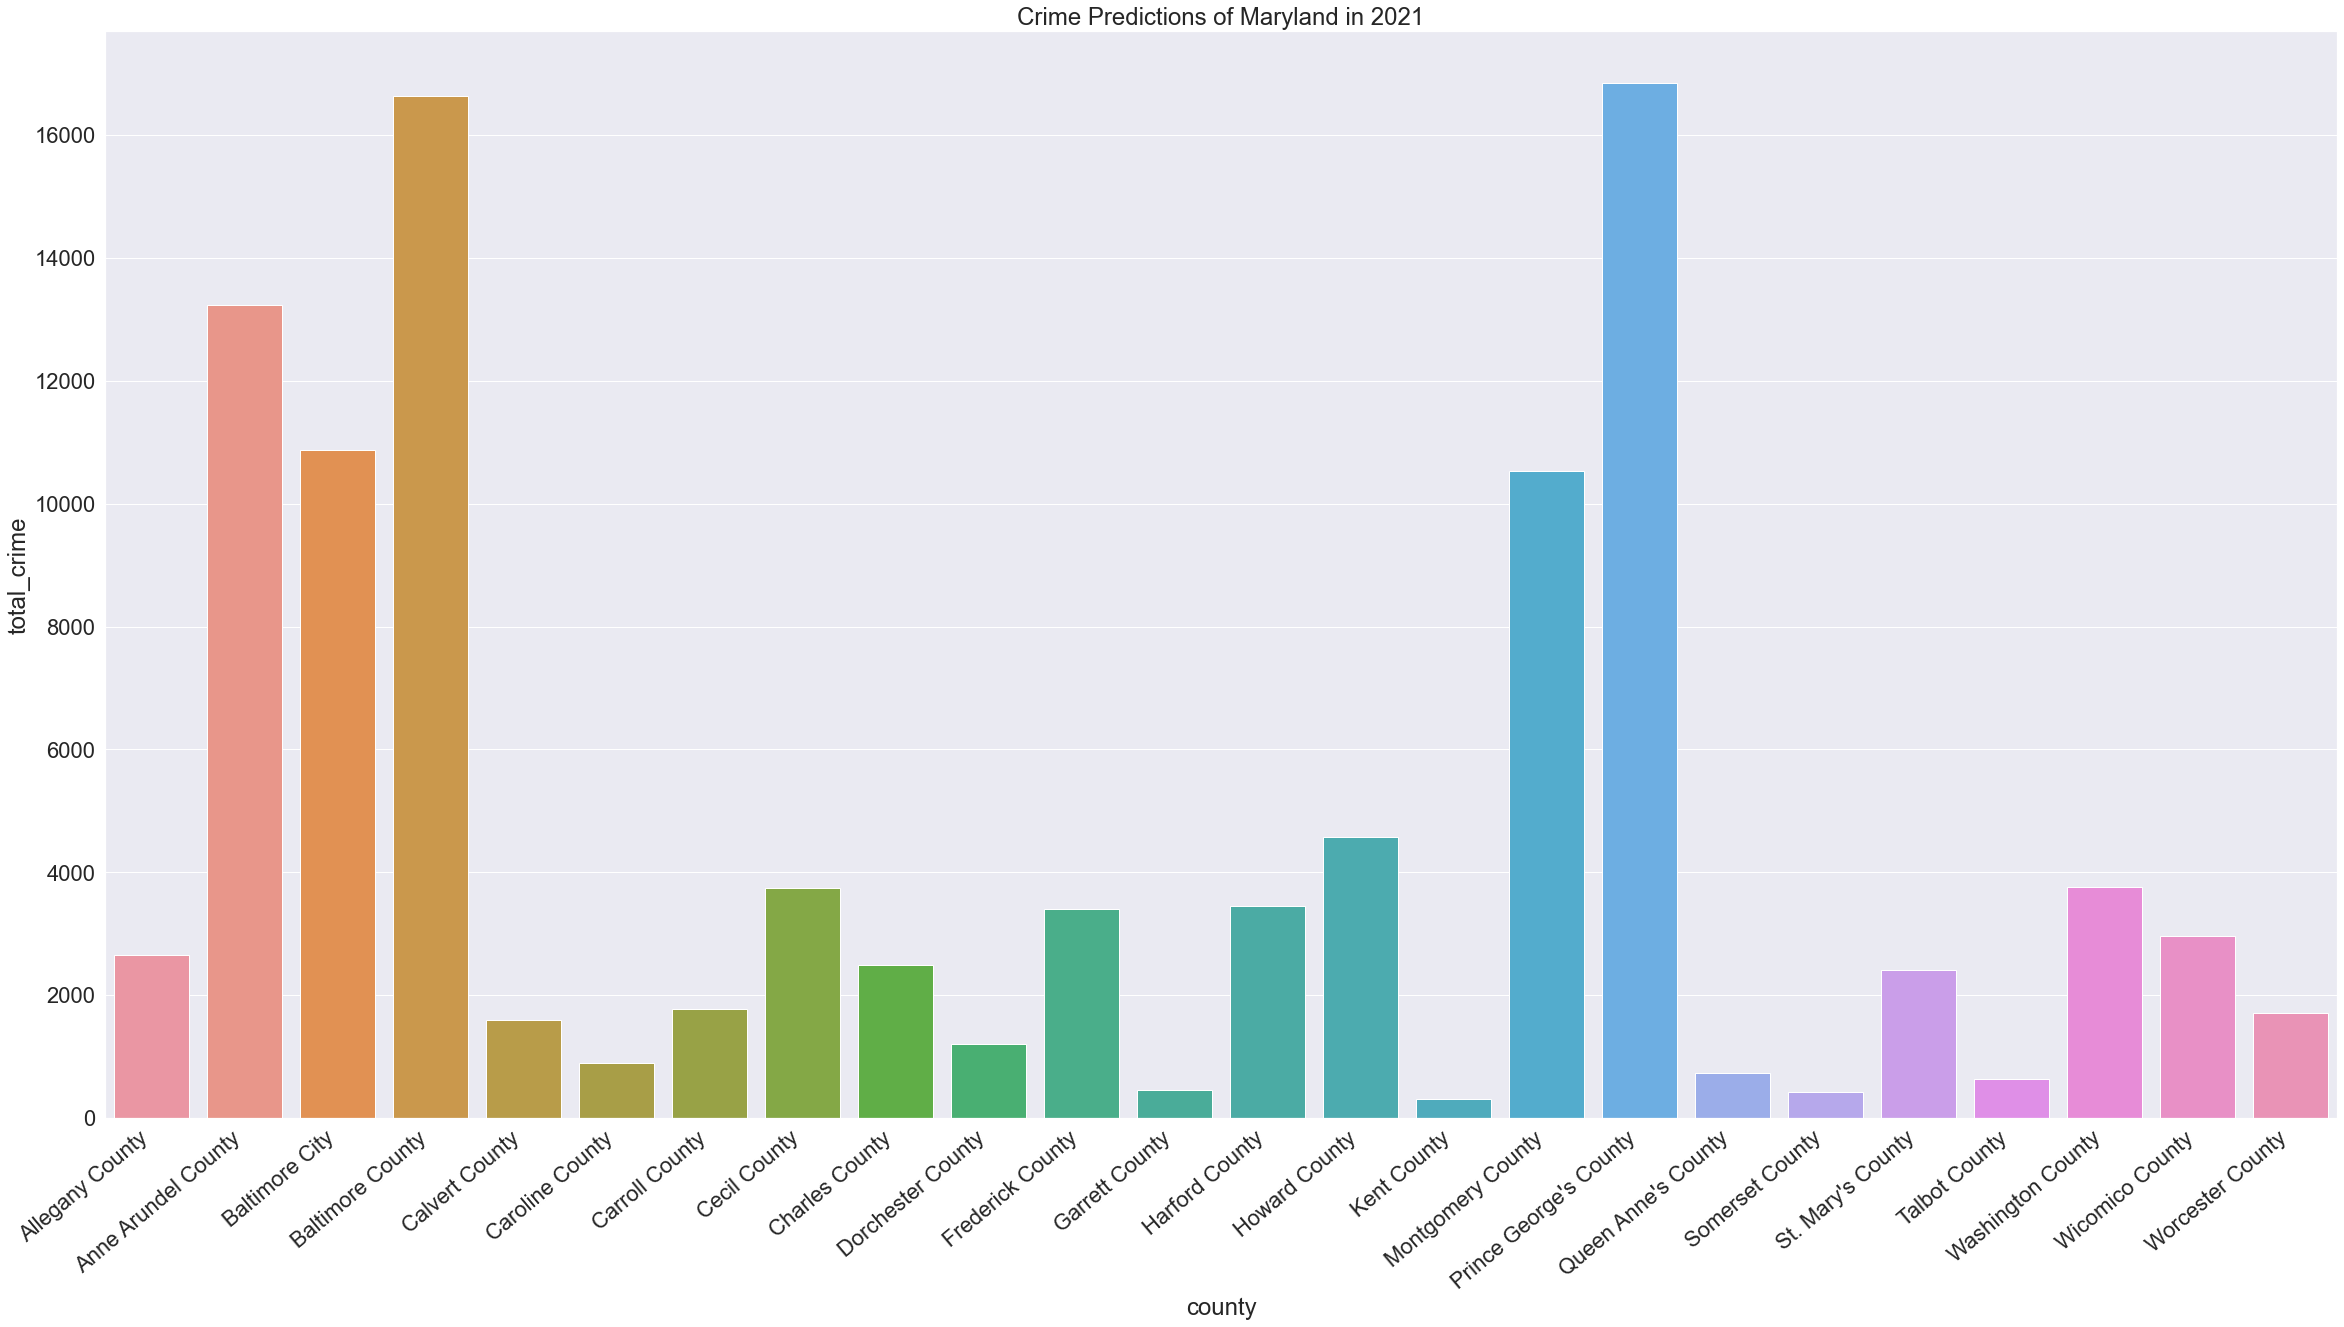

In [28]:
sns.set(font_scale=2) 
ax = sns.barplot(x = 'county', y = "total_crime", data = df_2021)
ax.set_title('Crime Predictions of Maryland in 2021')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

The total crime of each county is quite obvious. We could observe that our county has almost the highest number of crime committed in Maryland. The differences among the counties are huge.

# Conclusion & Insight

After fitting the simple linear function of y = ax +b to predict the total crimes Y in year X, we found out that impact of county should also be taken into account. Therefore, based on the huge differences among the counties, we then added interaction terms of year*county. The predictions are relatively more accurate. However, we noticed a sudden decrease of the total number of crimes. And finally, we decided to fit a polynomial model with interaction terms. The results of predictions are impressive.

Based on our analysis and observations, we believe that the number of crime in Maryland since 2010 has dropped much more quickly than before, meaning that our state is getting better in recent years. However, from the data and predictions, we conclude that the total crime number is showing huge discrepancies among different counties in Maryland. 

Although the easiest suggestion for this problem coming out the mind might just be sending out more police officer to provide a better level of security in those counties with higher number of crimes committed, we think further analysis of the county, crime characters and the population should be conducted to provide a better solution.